# Importing all the files required - along with the libraries

In [4]:
import pandas as pd
import numpy as np
import pycountry
import traceback
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# imporing the three data sets required

company=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt', sep="\t", encoding = "palmos")
round2=pd.read_csv('rounds2.csv', encoding = "palmos")
mappings=pd.read_csv('mapping.csv',index_col=None)

# Data prepration and missing value handling
1. How many unique companies are present in the companies file?
2. How many unique companies are present in rounds2?
3. Removing all the columns not used in the analysis.
4. Outer merge is done - so that we dont loose any information on funding recieved for questions in 2.1

In [8]:
# Checking data for null values
print(company.isnull().sum())
company.isnull().all(axis=1).sum()
# Putting the value of unique identifier in lower case to avoid over calculating unique values
company['permalink']=company['permalink'].map(lambda x:x.lower())
print('The number of unique values in data fame is {}'.format(len(company.permalink.unique())))

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64
The number of unique values in data fame is 66368


The below mentioned colums have been deleated as they are found to be of no use and high number of missing values- analyst doesnt feel the need for imputation

In [9]:
company=company.drop('founded_at',axis=1)
company=company.drop('city',axis=1)
company=company.drop('region',axis=1)
company=company.drop('state_code',axis=1)
company=company.drop('homepage_url',axis=1)

In [10]:
print(round2.isnull().sum())
# round2.isnull().all(axis=1).sum()
round2['company_permalink']=round2['company_permalink'].map(lambda x:x.lower())
print('The number of unique values in data fame is {}'.format(len(round2.company_permalink.unique())))

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64
The number of unique values in data fame is 66368


In [11]:
round2=round2.drop('funding_round_code', axis =1)
round2=round2.drop('funded_at', axis =1)
round2=round2.drop('funding_round_permalink', axis =1)

In [12]:
# master_frame=pd.merge(company,round2,how="inner", left_on='permalink', right_on='company_permalink', indicator= True)
# master_frame.info()

master_frame=pd.merge(company,round2,how="outer", left_on='permalink', right_on='company_permalink', indicator= True)
df=master_frame.groupby('_merge')
df.count()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd
_merge,,,,,,,,
left_only,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0
both,114949,114948,111539,114949,106271,114949,114949,94959


Above is done check if there are data which is in one data set and not in other 

# Funding Type Analysis

1. Removing the null value for 'funding_round_type' and 'raised_amount_usd'
2. Finding the most invested funding round type - in terms of-
    - High total investments
    - High total number of investments and 
    - Average investments within scope of the fund

Since the spead of the data is such that imputing value of amount raised doesnt make sense - i have decided to remove the null values/missing values.

In [13]:
master_frame = master_frame.loc[master_frame.funding_round_type.notnull()]
master_frame = master_frame.loc[master_frame.raised_amount_usd.notnull()]
print(len(master_frame.index))
master_frame.isnull().sum()

94959


permalink                0
name                     1
category_list         1044
status                   0
country_code          5851
company_permalink        0
funding_round_type       0
raised_amount_usd        0
_merge                   0
dtype: int64

Total investment in various 'funding_round_type'

In [14]:
df2=master_frame.groupby('funding_round_type')
print(master_frame.raised_amount_usd.sum())
print(master_frame.raised_amount_usd.count())
(df2.raised_amount_usd.sum().sort_values(ascending= False)/1000000)

990125085135.0
94959


funding_round_type
venture                  590126.216876
private_equity           141925.436105
debt_financing           113884.840886
post_ipo_equity           51610.606151
undisclosed               30441.429697
post_ipo_debt             25643.094917
seed                      16989.864181
grant                      9134.424145
angel                      4659.255123
secondary_market           2389.488903
convertible_note           2103.125572
equity_crowdfunding         661.116163
product_crowdfunding        526.168593
non_equity_assistance        30.017823
Name: raised_amount_usd, dtype: float64

Total number of investment in various 'funding_round_type'

In [15]:
(df2.raised_amount_usd.mean().sort_values(ascending= False)/1000000)

funding_round_type
post_ipo_debt            168.704572
post_ipo_equity           82.182494
secondary_market          79.649630
private_equity            73.308593
undisclosed               19.242370
debt_financing            17.043526
venture                   11.748949
grant                      4.300576
convertible_note           1.453439
product_crowdfunding       1.363131
angel                      0.958694
seed                       0.719818
equity_crowdfunding        0.538368
non_equity_assistance      0.411203
Name: raised_amount_usd, dtype: float64

Avg. investment in various 'funding_round_type'

In [16]:
df2.raised_amount_usd.count().sort_values(ascending= False)

funding_round_type
venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: raised_amount_usd, dtype: int64

# Country Analysis

1. Listing of the company in terms of the investments received.
2. Listing of companies in terms of number of investments received.
3. Please note while the total investment is higher for India- than canada while the total number of investment is higher for canada.
4. to choose for third position i have checked average investment in canada and India- since for India avg. Inv is >$15MM- same has been droped 


Total investment - Ranking

In [ ]:
# Slicingt data for funding round type - Venture
master_venture=master_frame.loc[(master_frame.funding_round_type=='venture')]
df= master_venture.groupby('country_code')
top9=(df.raised_amount_usd.sum()/1000000).sort_values(ascending= False)[:9]
top9

Total number of investment - Ranking

In [ ]:
top9_count=df.raised_amount_usd.count().sort_values(ascending= False)[:10]
top9_count

In [ ]:
df= master_venture.loc[master_frame['country_code'].isin(['IND','CAN', 'USA', 'GBR'])]
df3=df.groupby('country_code')
df3.raised_amount_usd.mean()/1000000

Above is done to select betwwn India and Canada is the third best destination.
Since avg. investment in India is > $15MM same has been excluded.

# Sector  Analysis
1. Mapping of the category list with sectors
2. Merging of the data for sector wise analysis 
3. Slicing the data for $5MM to $15MM investment space
4. Removing the companies for which status is closed.

In [ ]:
mappings['category_list']=mappings['category_list'].replace({'0':'na'},regex=True)
mappings.set_index('category_list',inplace=True)
mappings=mappings[:].idxmax(axis=1)
mappings=mappings.reset_index()
mappings.rename(columns={0:'category'},inplace=True)
mappings.head()

In [3]:
# master_venture['category_list']= master_venture.loc[:,('category_list')].apply(lambda x: str(x).split("|")[0])
master_venture['category_list']= master_venture['category_list'].map(lambda x: str(x).split("|")[0])
master_venture.head()

# df_sector=pd.merge(mappings,master_venture,how='outer', on='category_list')
# df_sector=df_sector.loc[(df_sector.raised_amount_usd>=5000000)&(df_sector.raised_amount_usd<=15000000)]
# df_sector=df_sector.loc[df_sector.status.isin(['acquired','ipo','operating'])]
# df_sector.head()

NameError: name 'master_venture' is not defined

In [17]:
d1=df_sector.loc[df_sector.country_code=='USA']
print('Total number of companies in USA is {}'.format(d1.raised_amount_usd.count()))
print('Total investment in USA is {}'.format(d1.raised_amount_usd.sum()))
d1.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3]

Total number of companies in USA is 11344
Total investment in USA is 101545266754.0


category
Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2147
Name: raised_amount_usd, dtype: int64

In [18]:
# Ranking of the companies in order of investment recieved.

d1sub=d1.groupby(['category','name'])
d1sub.raised_amount_usd.sum().sort_values(ascending=False)[0:10]

category                                 name                           
News, Search and Messaging               Airspan Networks                   81769000.0
Cleantech / Semiconductors               Biodesix                           75300000.0
Entertainment                            Avnera                             71062970.0
Cleantech / Semiconductors               Tigo Energy                        68739496.0
Social, Finance, Analytics, Advertising  SST Inc. (Formerly ShotSpotter)    67933006.0
Health                                   EndoGastric Solutions              67896724.0
Others                                   Virtustream                        64300000.0
Social, Finance, Analytics, Advertising  Demandbase                         63000000.0
                                         Intacct                            61800000.0
Cleantech / Semiconductors               ForSight Labs                      61300001.0
Name: raised_amount_usd, dtype: float64

In [19]:
d2=df_sector.loc[df_sector.country_code=='GBR']
print('Total number of companies in GBR is {}'.format(d2.raised_amount_usd.count()))
print('Total investment in GBR is {}'.format(d2.raised_amount_usd.sum()))
d2.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3]

Total number of companies in GBR is 587
Total investment in GBR is 5093543406.0


category
Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 115
Name: raised_amount_usd, dtype: int64

In [20]:
# Ranking of the companies in order of investment recieved.
d2sub=d2.groupby(['category','name'])
d2sub.raised_amount_usd.sum().sort_values(ascending=False)[0:10]

category                                 name                  
Automotive & Sports                      GreenRoad Technologies    52500000.0
Social, Finance, Analytics, Advertising  Celltick Technologies     37500000.0
News, Search and Messaging               Ubiquisys                 37000000.0
Others                                   Electric Cloud            37000000.0
                                         SenSage                   36250000.0
News, Search and Messaging               brylle                    36000000.0
Cleantech / Semiconductors               EUSA Pharma               35600000.0
Automotive & Sports                      Autoquake                 35557140.0
Social, Finance, Analytics, Advertising  myThings                  34000000.0
                                         Zopa                      32900000.0
Name: raised_amount_usd, dtype: float64

In [21]:
d3=df_sector.loc[df_sector.country_code=='CAN']
print('Total number of companies in CAN is {}'.format(d3.raised_amount_usd.count()))
print('Total investment in CAN is {}'.format(d3.raised_amount_usd.sum()))
# Ranking basis number of investments
print(d3.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3])
# Ranking basis number of investments
d3.groupby('category').raised_amount_usd.sum().sort_values(ascending=False)[:3]

Total number of companies in CAN is 391
Total investment in CAN is 3353474736.0
category
Others                                     99
Cleantech / Semiconductors                 99
Social, Finance, Analytics, Advertising    74
Name: raised_amount_usd, dtype: int64


category
Cleantech / Semiconductors                 894427439.0
Others                                     853207962.0
Social, Finance, Analytics, Advertising    615143075.0
Name: raised_amount_usd, dtype: float64

In [22]:
d3sub=d3.groupby(['category','name'])
d3sub.raised_amount_usd.sum().sort_values(ascending=False)[0:10]

category                                 name               
Cleantech / Semiconductors               Fresco Microchip       48000000.0
                                         Ostara                 43152682.0
News, Search and Messaging               Dayforce               40000000.0
Others                                   QuickPlay Media        38700000.0
Cleantech / Semiconductors               Diablo Technologies    35500000.0
                                         Zymeworks              34100000.0
Social, Finance, Analytics, Advertising  Wave Accounting        33000000.0
Others                                   NewStep Networks       31477853.0
News, Search and Messaging               Slyce                  31450000.0
Cleantech / Semiconductors               enGene                 31150000.0
Name: raised_amount_usd, dtype: float64

# Plotting of results

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

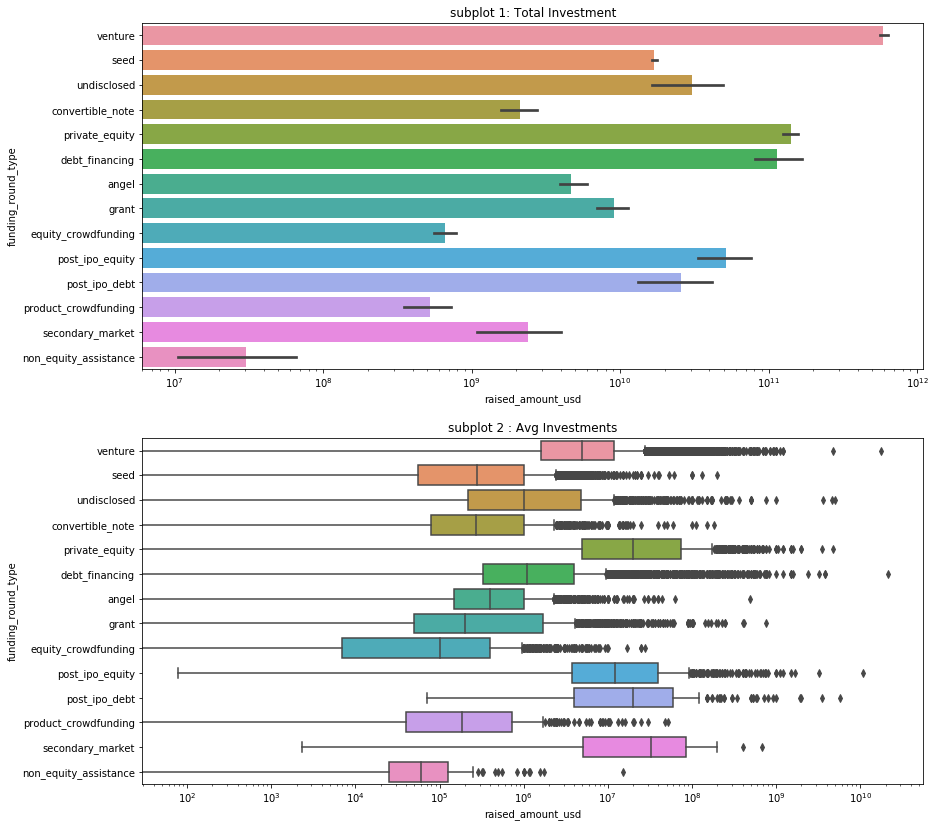

In [30]:
plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.title("subplot 1: Total Investment")
sns.barplot(y= 'funding_round_type', x='raised_amount_usd', data=master_frame, estimator=np.sum)
plt.xscale('log')

plt.subplot(2, 1, 2)
plt.title("subplot 2 : Avg Investments")
sns.boxplot(y= 'funding_round_type', x='raised_amount_usd', data=master_frame )
plt.xscale('log')

#A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


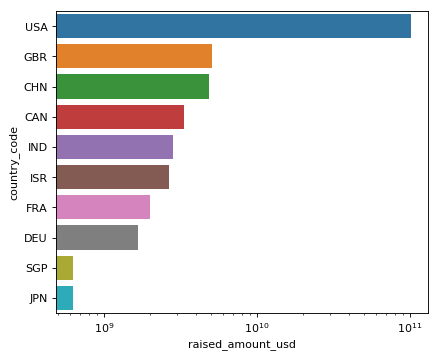

In [28]:
sectorsort= df_sector.groupby('country_code').raised_amount_usd.sum().sort_values(ascending= False)
top9=pd.DataFrame(sectorsort[0:10])
top9=top9.reset_index()

plt.figure(num=None, figsize=(6,5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='raised_amount_usd', y='country_code', data=top9)
plt.xscale('log')
plt.show()

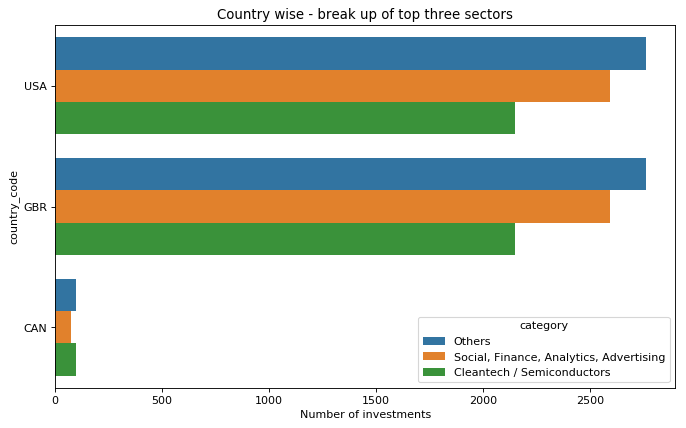

In [29]:
plot1=pd.DataFrame(d1.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3])
plot1=plot1.reset_index()
plot1['country_code']= 'USA'

plot2=pd.DataFrame(d2.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3])
plot2=plot1.reset_index()
plot2['country_code']= 'GBR'

plot3=pd.DataFrame(d3.groupby('category').raised_amount_usd.count().sort_values(ascending=False)[:3])
plot3=plot3.reset_index()
plot3['country_code']= 'CAN'

sectorplot= pd.concat([plot1, plot2,plot3], axis =0)
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y='country_code', x='raised_amount_usd', hue='category', data=sectorplot)
plt.title("Country wise - break up of top three sectors")
plt.xlabel("Number of investments")
# plt.xscale('log')
plt.show()